# Mick Schumacher
<img src="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/image.img.1920.medium.jpg/1641824836549.jpg" width="300">

### Team: Haas F1 Team

<img src ="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/helmet.img.png/1617101189118.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

msc_laps <- lap_data %>%
            filter(driverId == 854)

raceId,n
<dbl>,<int>
1052,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



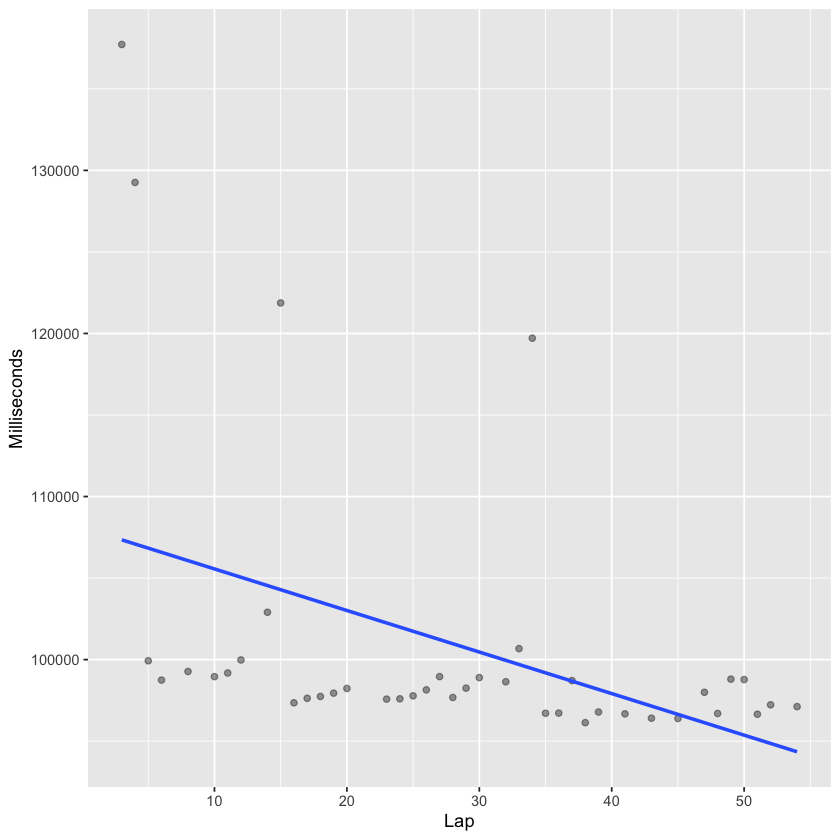

In [4]:
#1. BAHRAIN 

ms_bahrain <- msc_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ms_bahrain_clean <- ms_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_bahrain_clean
ms_bahrain_clean_ID <- ms_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_bahrain_races <- msc_laps %>%
                    filter(raceId %in% ms_bahrain_clean_ID)

formulaone_split <- initial_split(ms_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


raceId,n
<dbl>,<int>
1072,8


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 0 breaks instead.”
Warning message:
“Too little data to stratify.
* Resampling will be unstratified.”
`geom_smooth()` using formula 'y ~ x'



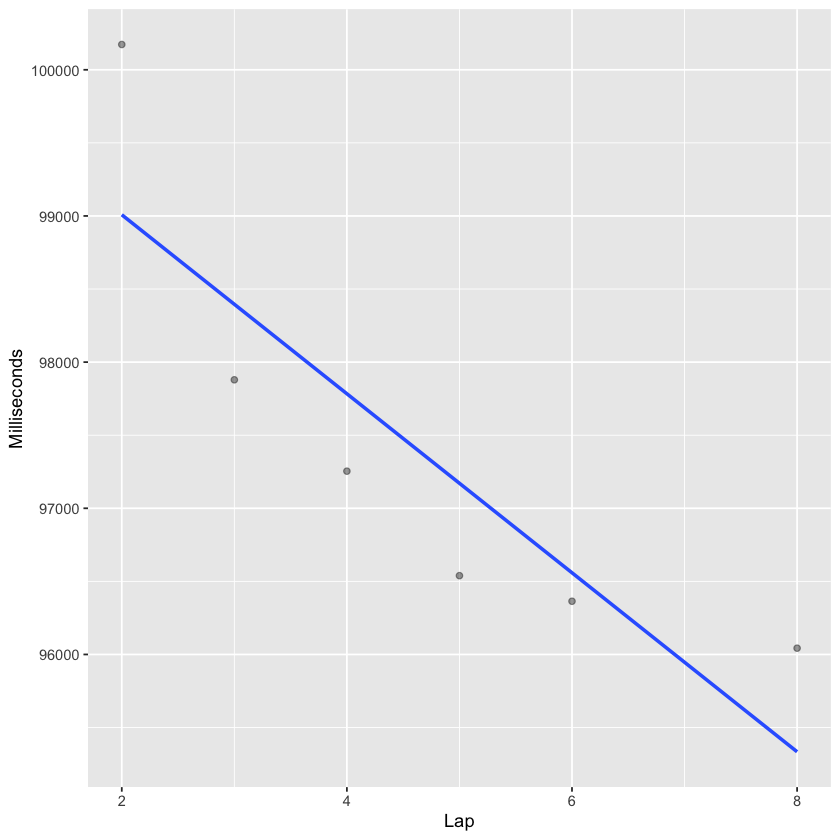

In [5]:
#2. Saudi Arabia

ms_saudi <- msc_laps %>%
                filter(raceId %in% saudi_race_ID) 

ms_saudi_clean <- ms_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_saudi_clean
ms_saudi_clean_ID <- ms_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_saudi_races <- msc_laps %>%
                    filter(raceId %in% ms_saudi_clean_ID)

formulaone_split <- initial_split(ms_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


In [6]:
# #3. Australia

# ms_aus <- msc_laps %>%
#                 filter(raceId %in% aus_race_ID) 

# ms_aus_clean <- ms_aus %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_aus_clean
# ms_aus_clean_ID <- ms_aus_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_aus_races <- msc_laps %>%
#                     filter(raceId %in% ms_aus_clean_ID)

# formulaone_split <- initial_split(ms_aus_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()
 

raceId,n
<dbl>,<int>
1053,61


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



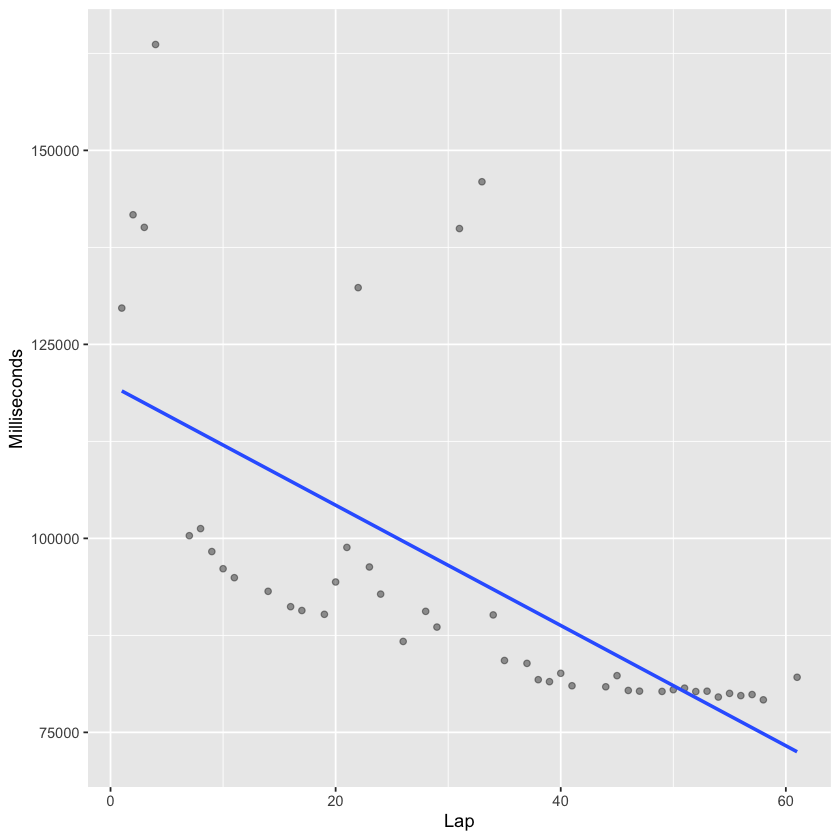

In [7]:
#4. Italy, Imola

ms_imola <- msc_laps %>%
                filter(raceId %in% imola_race_ID) 

ms_imola_clean <- ms_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_imola_clean
ms_imola_clean_ID <- ms_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_imola_races <- msc_laps %>%
                    filter(raceId %in% ms_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()
 

raceId,n
<dbl>,<int>
1067,56


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



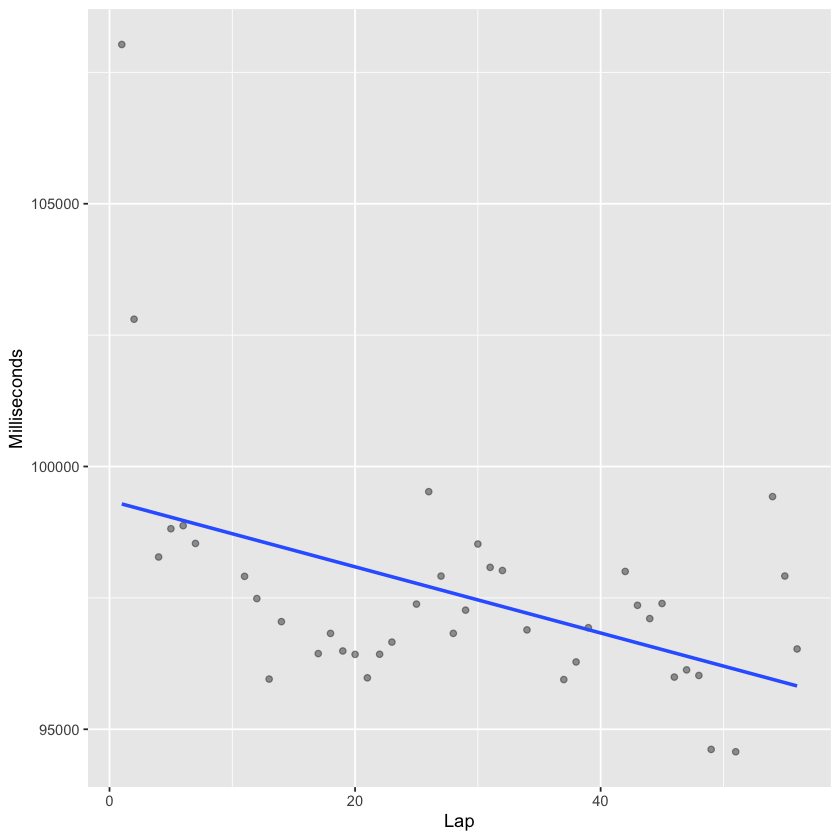

In [8]:
#5. Turkey (Replacing Miami)

ms_turkey <- msc_laps %>%
                filter(raceId %in% turkey_race_ID) 

ms_turkey_clean <- ms_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_turkey_clean
ms_turkey_clean_ID <- ms_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_turkey_races <- msc_laps %>%
                    filter(raceId %in% ms_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()
 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1055,64


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



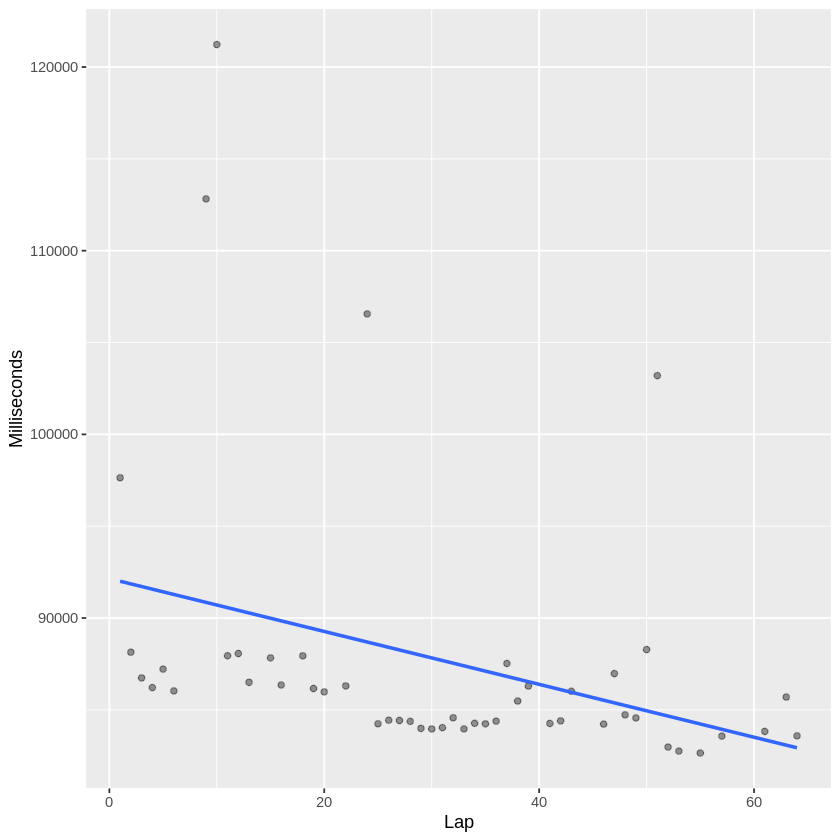

In [16]:
#6. Spain

ms_spain <- msc_laps %>%
                filter(raceId %in% spain_race_ID) 

ms_spain_clean <- ms_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_spain_clean
ms_spain_clean_ID <- ms_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_spain_races <- msc_laps %>%
                    filter(raceId %in% ms_spain_clean_ID)

formulaone_split <- initial_split(ms_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,75


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



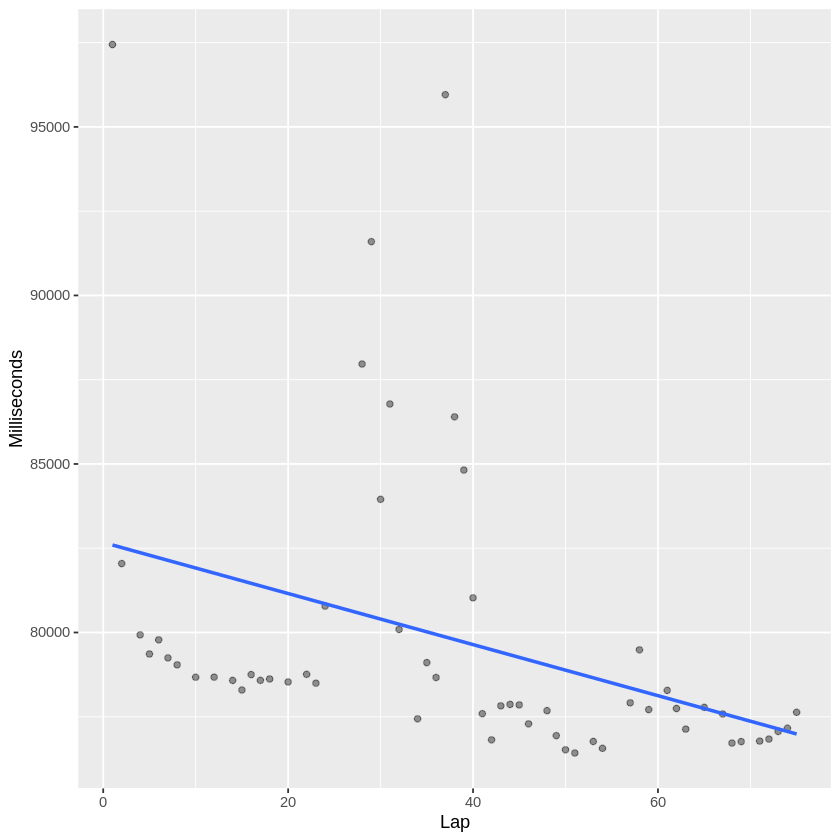

In [17]:
#7. Monaco

ms_monaco <- msc_laps %>%
                filter(raceId %in% monaco_race_ID) 

ms_monaco_clean <- ms_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_monaco_clean
ms_monaco_clean_ID <- ms_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monaco_races <- msc_laps %>%
                    filter(raceId %in% ms_monaco_clean_ID)

formulaone_split <- initial_split(ms_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



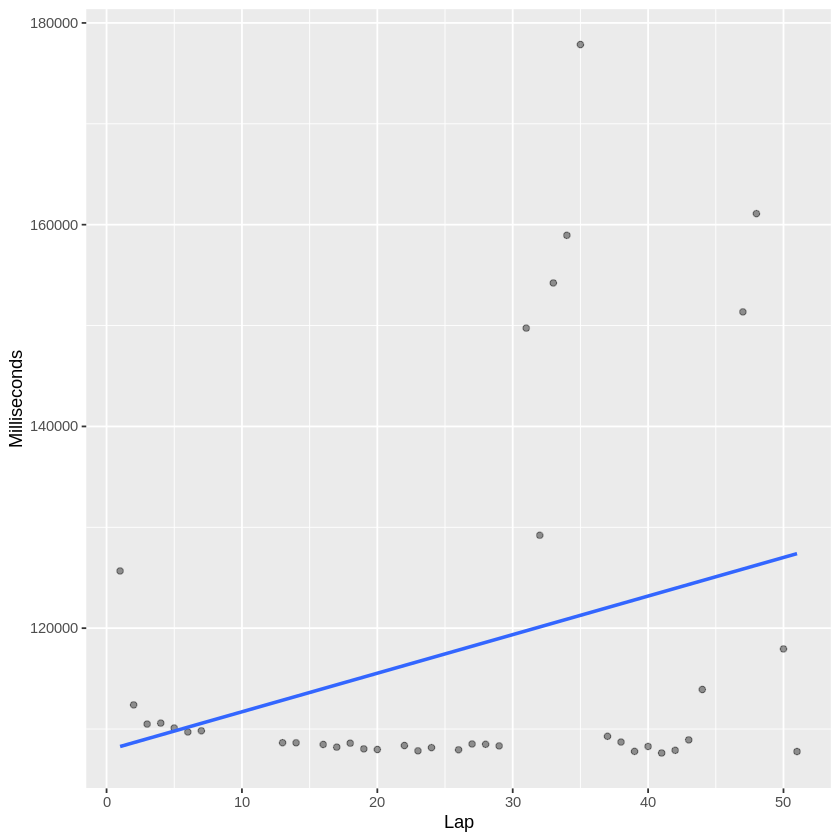

In [18]:
#8. Azerbaijan

ms_azerbaijan <- msc_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ms_azerbaijan_clean <- ms_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_azerbaijan_clean
ms_azerbaijan_clean_ID <- ms_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_azerbaijan_races <- msc_laps %>%
                    filter(raceId %in% ms_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


In [19]:
#9. Canada

# ms_canada <- msc_laps %>%
#                 filter(raceId %in% canada_race_ID) 

# ms_canada_clean <- ms_canada %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_canada_clean
# ms_canada_clean_ID <- ms_canada_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_canada_races <- msc_laps %>%
#                     filter(raceId %in% ms_canada_clean_ID)

# formulaone_split <- initial_split(ms_canada_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1061,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



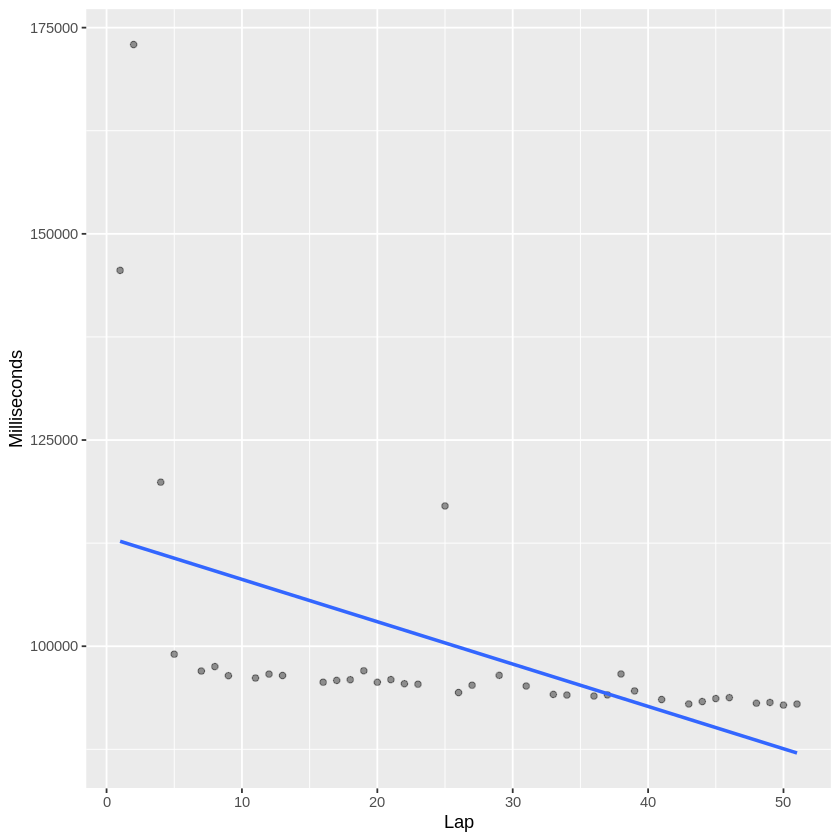

In [20]:
#10. Great Britain

ms_uk <- msc_laps %>%
                filter(raceId %in% uk_race_ID) 

ms_uk_clean <- ms_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uk_clean
ms_uk_clean_ID <- ms_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uk_races <- msc_laps %>%
                    filter(raceId %in% ms_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1058,69
1060,69


`geom_smooth()` using formula 'y ~ x'



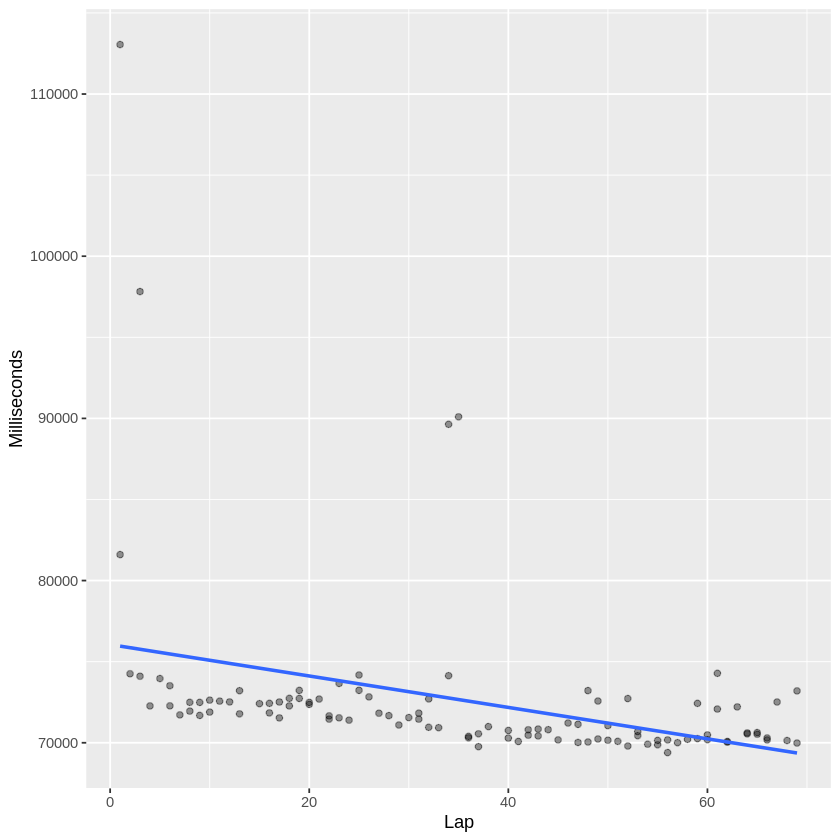

In [21]:
#11. Austria

ms_austria <- msc_laps %>%
                filter(raceId %in% austria_race_ID) 

ms_austria_clean <- ms_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austria_clean
ms_austria_clean_ID <- ms_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austria_races <- msc_laps %>%
                    filter(raceId %in% ms_austria_clean_ID)

formulaone_split <- initial_split(ms_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



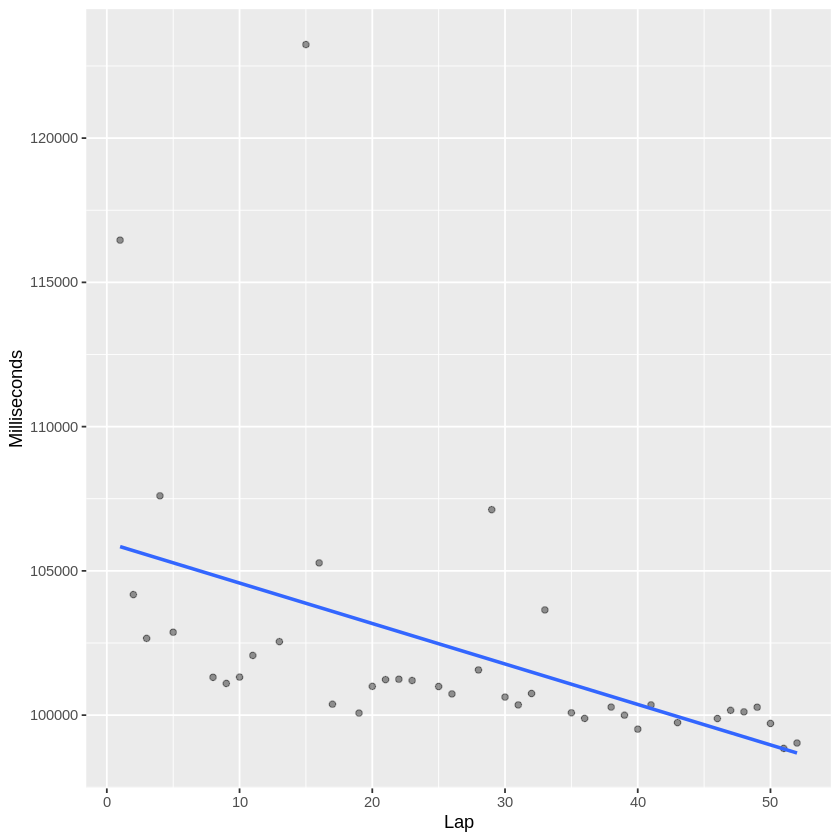

In [22]:
#12. France

ms_france <- msc_laps %>%
                filter(raceId %in% france_race_ID) 

ms_france_clean <- ms_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_france_clean
ms_france_clean_ID <- ms_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_france_races <- msc_laps %>%
                    filter(raceId %in% ms_france_clean_ID)

formulaone_split <- initial_split(ms_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



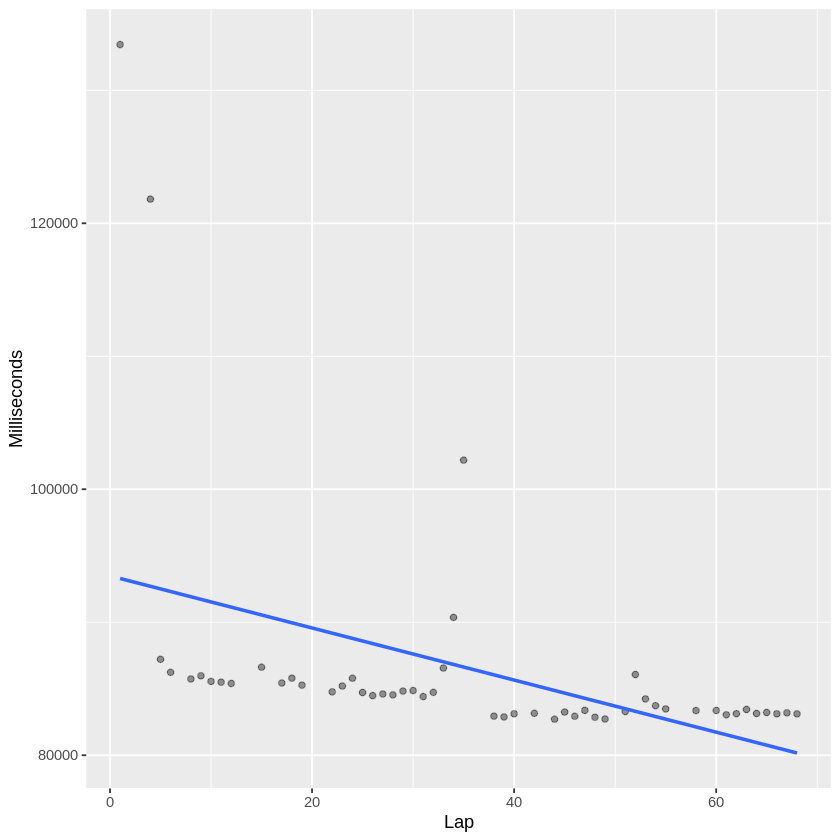

In [23]:
#13. Hungary

ms_hungary <- msc_laps %>%
                filter(raceId %in% hungary_race_ID) 

ms_hungary_clean <- ms_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
ms_hungary_clean
ms_hungary_clean_ID <- ms_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_hungary_races <- msc_laps %>%
                    filter(raceId %in% ms_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ms_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


In [24]:
#14. Belgium

# ms_belgium <- msc_laps %>%
#                 filter(raceId %in% belgium_race_ID) 

# ms_belgium_clean <- ms_belgium %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_belgium_clean
# ms_belgium_clean_ID <- ms_belgium_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_belgium_races <- msc_laps %>%
#                     filter(raceId %in% ms_belgium_clean_ID)

# formulaone_split <- initial_split(ms_belgium_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



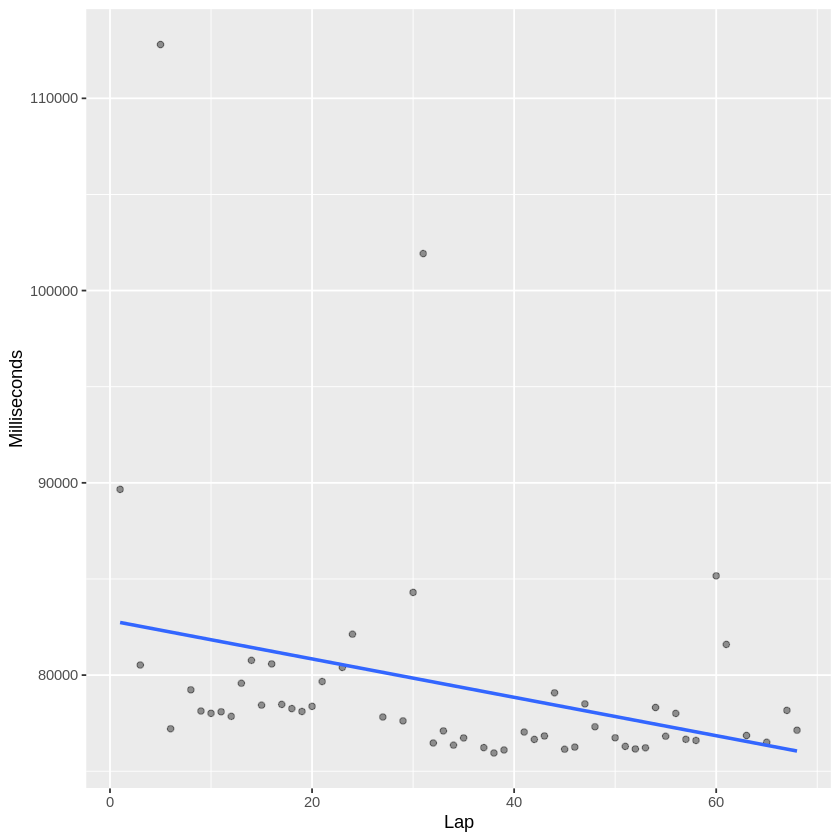

In [25]:
#15. Netherlands

ms_netherlands <- msc_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ms_netherlands_clean <- ms_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_netherlands_clean
ms_netherlands_clean_ID <- ms_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_netherlands_races <- msc_laps %>%
                    filter(raceId %in% ms_netherlands_clean_ID)

formulaone_split <- initial_split(ms_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1065,53


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



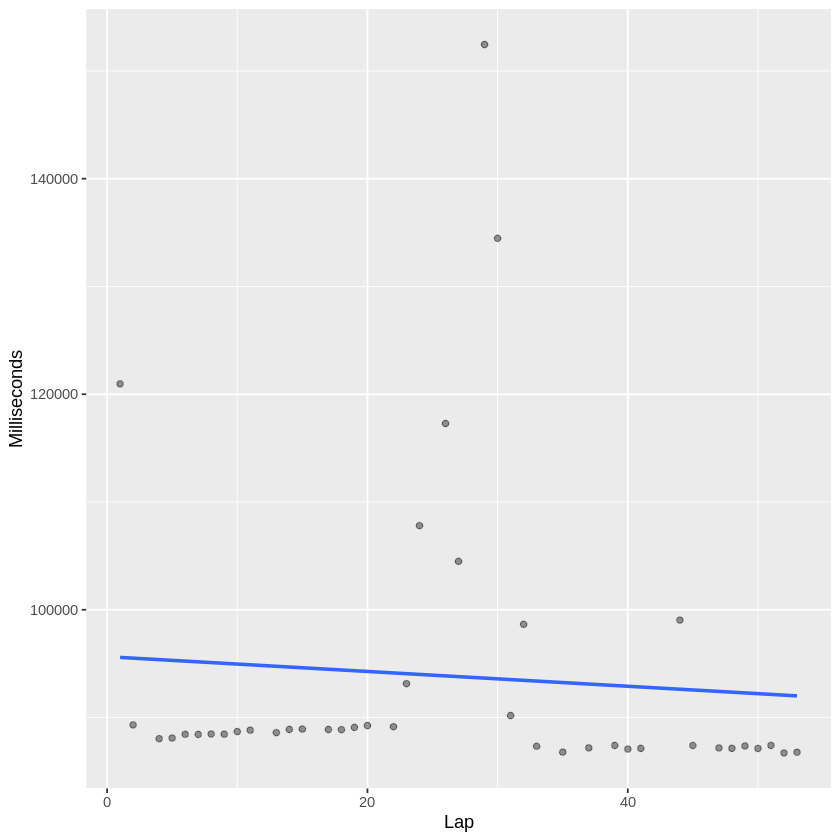

In [26]:
#16. Italy, Monza

ms_monza <- msc_laps %>%
                filter(raceId %in% monza_race_ID) 

ms_monza_clean <- ms_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_monza_clean
ms_monza_clean_ID <- ms_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monza_races <- msc_laps %>%
                    filter(raceId %in% ms_monza_clean_ID)

formulaone_split <- initial_split(ms_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


In [27]:
#17. Singapore

# ms_singapore <- msc_laps %>%
#                 filter(raceId %in% singapore_race_ID) 

# ms_singapore_clean <- ms_singapore %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_singapore_clean
# ms_singapore_clean_ID <- ms_singapore_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_singapore_races <- msc_laps %>%
#                     filter(raceId %in% ms_singapore_clean_ID)

# formulaone_split <- initial_split(ms_singapore_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()


In [28]:
#18. Japan

# ms_japan <- msc_laps %>%
#                 filter(raceId %in% japan_race_ID) 

# ms_japan_clean <- ms_japan %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))
# ms_japan_clean
# ms_japan_clean_ID <- ms_japan_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_japan_races <- msc_laps %>%
#                     filter(raceId %in% ms_japan_clean_ID)

# formulaone_split <- initial_split(ms_japan_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,54


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



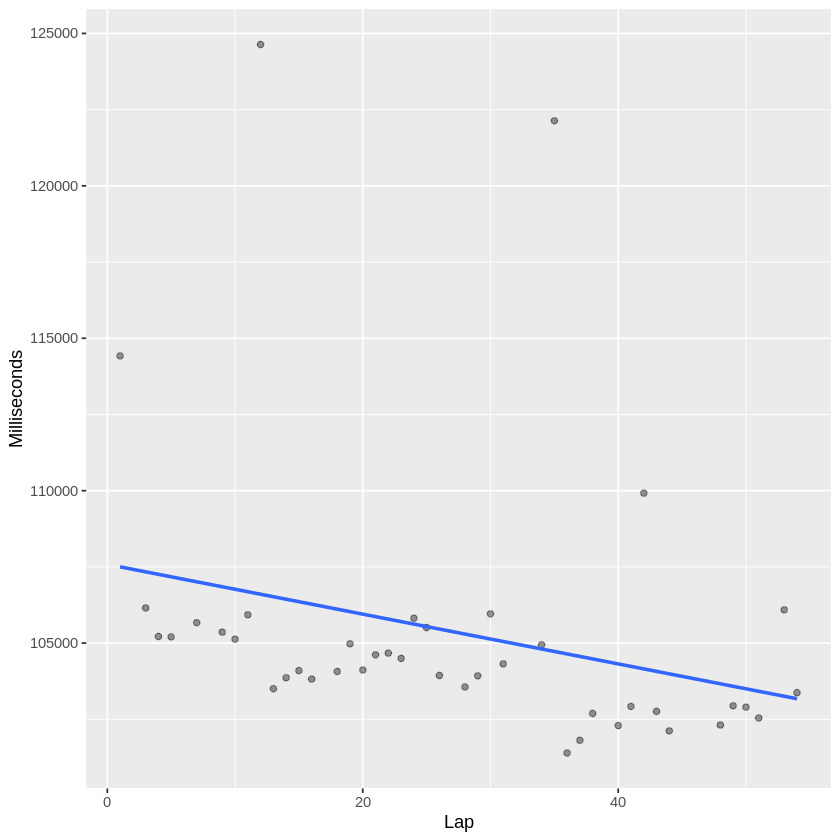

In [29]:
#19. USA, Austin

ms_austin <- msc_laps %>%
                filter(raceId %in% austin_race_ID) 

ms_austin_clean <- ms_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austin_clean
ms_austin_clean_ID <- ms_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austin_races <- msc_laps %>%
                    filter(raceId %in% ms_austin_clean_ID)

formulaone_split <- initial_split(ms_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


In [30]:
#20. Mexico

# ms_mexico <- msc_laps %>%
#                 filter(raceId %in% mexico_race_ID) 

# ms_mexico_clean <- ms_mexico %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_mexico_clean
# ms_mexico_clean_ID <- ms_mexico_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_mexico_races <- msc_laps %>%
#                     filter(raceId %in% ms_mexico_clean_ID)

# formulaone_split <- initial_split(ms_mexico_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



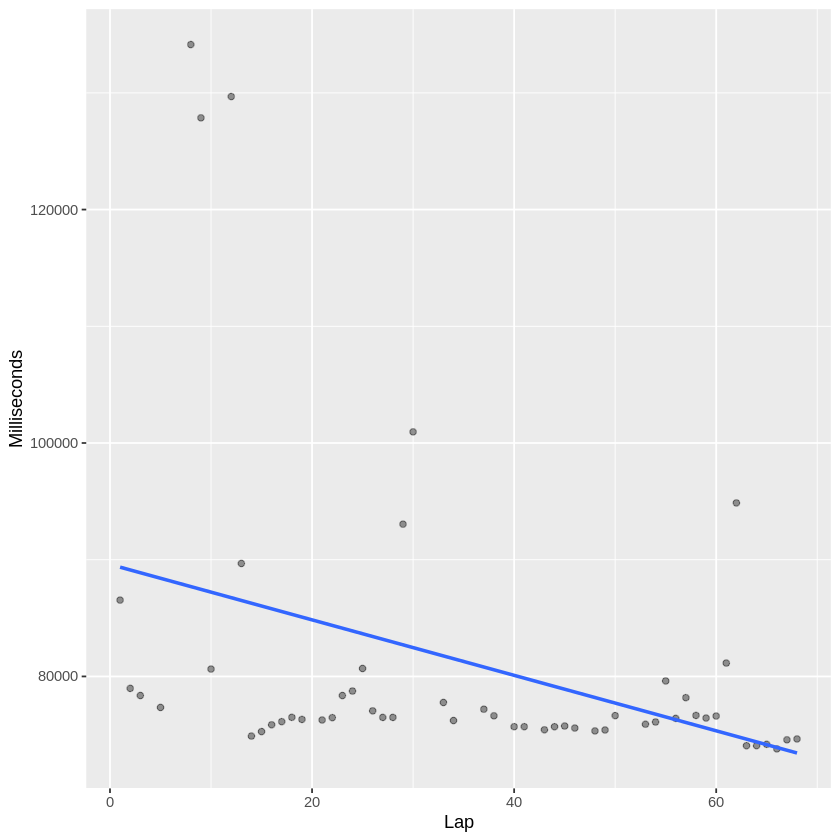

In [31]:
#21. Brazil

ms_brazil <- msc_laps %>%
                filter(raceId %in% brazil_race_ID) 

ms_brazil_clean <- ms_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_brazil_clean
ms_brazil_clean_ID <- ms_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_brazil_races <- msc_laps %>%
                    filter(raceId %in% ms_brazil_clean_ID)

formulaone_split <- initial_split(ms_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


raceId,n
<dbl>,<int>
1073,57


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



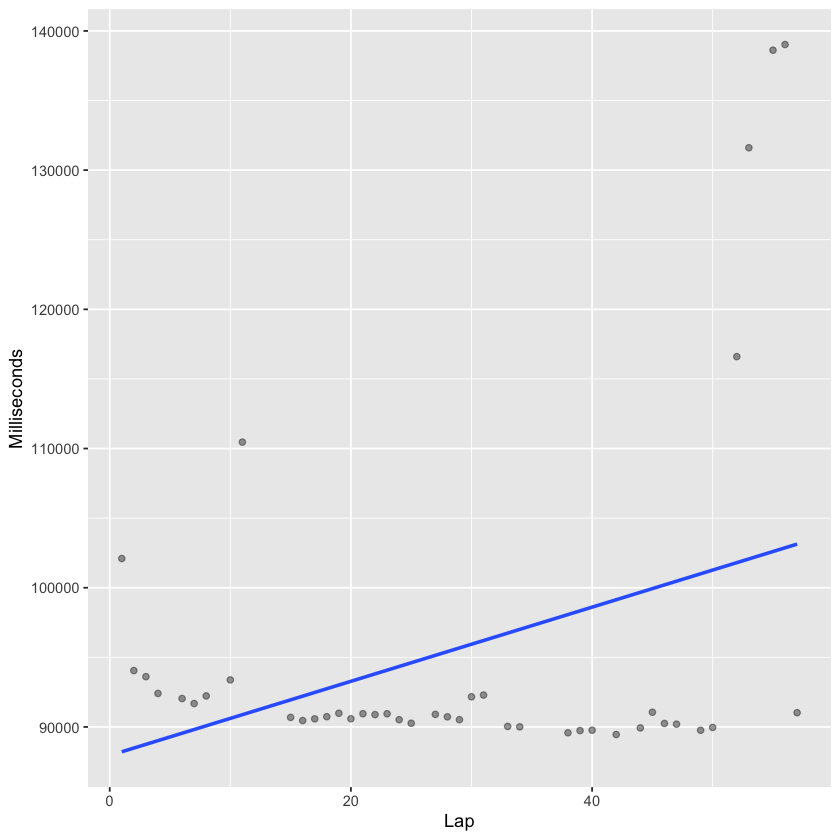

In [9]:
#22. Abu Dhabi

ms_uae <- msc_laps %>%
                filter(raceId %in% uae_race_ID) 

ms_uae_clean <- ms_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uae_clean
ms_uae_clean_ID <- ms_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uae_races <- msc_laps %>%
                    filter(raceId %in% ms_uae_clean_ID)

formulaone_split <- initial_split(ms_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()
